In [1]:
# mount to google driver in order to use data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


In [2]:
# read CSV
demographics = pd.read_csv('/content/drive/MyDrive/HTML final project/demographics.csv')
location = pd.read_csv('/content/drive/MyDrive/HTML final project/location.csv')
population = pd.read_csv('/content/drive/MyDrive/HTML final project/population.csv')
satisfaction = pd.read_csv('/content/drive/MyDrive/HTML final project/satisfaction.csv')
services = pd.read_csv('/content/drive/MyDrive/HTML final project/services.csv')
status = pd.read_csv('/content/drive/MyDrive/HTML final project/status.csv')

Test_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Test_IDs.csv')
Train_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Train_IDs.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/HTML final project/sample_submission.csv')



# merge location.csv and population.csv
location['Population'] = location['Zip Code'].map(population.set_index('Zip Code')['Population'])




# fill in NaN because all values are same
location.fillna(value = {"Count": 1.0, "Country": 'United States', "State": 'California'}, inplace = True)
services.fillna(value = {"Count": 1.0, "Quarter": 'Q3'}, inplace = True)




# change string to value
# change string to value
# change string to value
demographics['Gender'].replace(['Female', 'Male'], [0, 1],inplace = True)
demographics['Under 30'].replace(['No', 'Yes'], [0, 1],inplace = True)
demographics['Senior Citizen'].replace(['No', 'Yes'], [0, 1],inplace = True)
demographics['Married'].replace(['No', 'Yes'], [0, 1],inplace = True)
demographics['Dependents'].replace(['No', 'Yes'], [0, 1],inplace = True)
location['Country'].replace(['United States'], [0.0],inplace = True)
location['State'].replace(['California'], [0.0],inplace = True)
services['Quarter'].replace(['Q3'], [0.0], inplace = True)
services['Referred a Friend'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Phone Service'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Multiple Lines'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Internet Service'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Online Security'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Online Backup'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Device Protection Plan'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Premium Tech Support'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Streaming TV'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Streaming Movies'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Streaming Music'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Unlimited Data'].replace(['No', 'Yes'], [0, 1], inplace = True)
services['Paperless Billing'].replace(['No', 'Yes'], [0, 1], inplace = True)

status['Churn Category'].replace(['No Churn', 'Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other'], [0, 1, 2, 3, 4, 5], inplace = True)

# ['Acampo', 'Acton', 'Adelanto', ...... , 'Yucca Valley', 'Zenia'] to [0, 1, 2, ......, 1100]
location['City'].replace(sorted(location['City'].loc[~location['City'].isnull()].unique()),
                         list(range(len(location['City'].loc[~location['City'].isnull()].unique()))), inplace = True)
# offer (None, A, B, C, D, E) to (0, 1, 2, 3, 4, 5)
services['Offer'].replace(sorted(services['Offer'].loc[~services['Offer'].isnull()].unique()),
                          list(range(len(services['Offer'].loc[~services['Offer'].isnull()].unique()))), inplace = True)
# ['Cable', 'DSL', 'Fiber Optic', 'None'] to [0, 1, 2, 3]
services['Internet Type'].replace(sorted(services['Internet Type'].loc[~services['Internet Type'].isnull()].unique()),
                         list(range(len(services['Internet Type'].loc[~services['Internet Type'].isnull()].unique()))), inplace = True)
# ['Month-to-Month', 'One Year', 'Two Year'] to [0, 1, 2]
services['Contract'].replace(sorted(services['Contract'].loc[~services['Contract'].isnull()].unique()),
                         list(range(len(services['Contract'].loc[~services['Contract'].isnull()].unique()))), inplace = True)
# ['Bank Withdrawal', 'Credit Card', 'Mailed Check'] to [0, 1, 2]
services['Payment Method'].replace(sorted(services['Payment Method'].loc[~services['Payment Method'].isnull()].unique()),
                         list(range(len(services['Payment Method'].loc[~services['Payment Method'].isnull()].unique()))), inplace = True)

location.drop(['Lat Long'], axis=1, inplace=True)

In [20]:
data = pd.read_csv('/content/drive/MyDrive/HTML final project/data.csv')

Index(['Unnamed: 0', 'Customer ID', 'Count', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Population', 'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Category'],
      dtype='object')

In [25]:
c = data.dropna().corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [37]:
for col in data.columns:
  if col != "Unnamed: 0" and col != "Customer ID":
    print(col)
    for j in range(len(so[col])):
      print(s[col][j])

Count
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Gender
0.06338861701987583
nan
1.0
0.15167951535805285
0.08058229640253796
0.029101262323732485
0.05555555555555564
0.05992437462555623
0.015955641156815026
nan
nan
0.0008599097933712196
0.34797781627012553
0.3008156540703709
0.2676329971704927
0.24511346594489017
nan
0.05555555555555564
0.08256310495783045
0.08790528609128077
0.11997134013534286
0.06874649261535887
0.1640724845755601
0.20825267255725705
0.010604746049596271
0.031295877196220255
0.06717581671186423
0.07953559537197229
0.2901294265928299
0.036246569683403354
0.12450298013899944
0.09128709291752772
0.11359236684941293
0.07647191129018732
0.09128709291752765
0.09677419354838736
0.09707253433941505
0.02301436544745806
0.003297309511313926
0.1505925434784789
0.05576826886423922
0.18286597791165496
0.09470170574633573
0.14574259760814662


In [30]:
(import numpy as np
linear_completion_one_to_one("Under 30", "Age", data , data_)
missing_rate_compare(data,data_ , "Age")

0
before: 0.001841620626151013
after: 0.001841620626151013


In [ ]:
data["Streaming Movies"]

0       1.0
1       1.0
2       0.0
3       0.0
4       NaN
       ... 
2167    NaN
2168    NaN
2169    0.0
2170    1.0
2171    1.0
Name: Streaming Movies, Length: 2172, dtype: float64

In [ ]:
import numpy as np

In [21]:
data = pd.read_csv('/content/drive/MyDrive/HTML final project/new_data.csv')
Train_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Train_IDs.csv')
Test_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Test_IDs.csv')

In [22]:
data_ = data.copy()

In [ ]:
sum(np.isnan(data['Latitude']))/len(data['Latitude'])

0.001841620626151013

In [ ]:
for i in data_.columns:
  if i!="Customer ID":
    print(i , sum(np.isnan(data[i]))/len(data[i]))

data_['Total Charges
Contract	']


Unnamed: 0 0.0
Count 0.0
Gender 0.12338858195211787
Age 0.001841620626151013
Under 30 0.016114180478821363
Senior Citizen 0.013351749539594844
Married 0.12062615101289134
Dependents 0.016574585635359115
Number of Dependents 0.016574585635359115
Country 0.0
State 0.0
City 0.018876611418047883
Zip Code 0.1289134438305709
Latitude 0.001841620626151013
Longitude 0.0009208103130755065
Population 0.1289134438305709
Quarter 0.0
Referred a Friend 0.012430939226519336
Number of Referrals 0.012430939226519336
Tenure in Months 0.12384898710865562
Offer 0.11740331491712708
Phone Service 0.13351749539594843
Avg Monthly Long Distance Charges 0.12845303867403315
Multiple Lines 0.12661141804788215
Internet Service 0.1210865561694291
Internet Type 0.13720073664825047
Avg Monthly GB Download 0.12661141804788215
Online Security 0.13213627992633517
Online Backup 0.1358195211786372
Device Protection Plan 0.11970534069981584
Premium Tech Support 0.11970534069981584
Streaming TV 0.12753222836095765
Streaming

In [15]:
def linear_completion_one_to_one(source , target ,data , _data ):  
  one = pd.concat([data[source], data[target]] , axis=1)

  one= one.dropna()
  from sklearn.linear_model import LinearRegression

  X = np.array(one[source])
  X = X.reshape(-1,1)
  reg = LinearRegression().fit(X, one[target])

  count = 0
  for i in range(len(data[target])):
    if np.isnan(data[target][i]) and not np.isnan(data[source][i]):
      data_.loc[i,target] = reg.predict(np.array(data[source][i]).reshape(-1,1))
      count +=1
  print(count)

In [16]:
def missing_rate_compare(data , data_ , feature):
  print("before:",sum(np.isnan(data[feature]))/len(data[feature]))
  print("after:",sum(np.isnan(data_[feature]))/len(data_[feature]))

In [ ]:
linear_completion_one_to_one("Avg Monthly Long Distance Charges","Total Long Distance Charges",data , data_)
missing_rate_compare(data,data_ , "Total Long Distance Charges")

241
before: 0.1261510128913444
after: 0.015193370165745856


In [ ]:
linear_completion_one_to_one("Total Charges","Total Revenue",data , data_)
missing_rate_compare(data,data_ , "Total Revenue")

233
before: 0.1252302025782689
after: 0.017955801104972375


In [ ]:
linear_completion_one_to_one("Total Revenue","Total Charges",data , data_)
missing_rate_compare(data,data_ , "Total Charges")

246
before: 0.13121546961325967
after: 0.017955801104972375


In [ ]:
linear_completion_one_to_one("Total Charges","Total Long Distance Charges",data , data_)
missing_rate_compare(data,data_ , "Total Long Distance Charges")

246
before: 0.1261510128913444
after: 0.0013812154696132596


In [ ]:
sum(np.isnan(data_['Total Charges']))/len(data_['Total Charges'])

0.016574585635359115

3.0    727
4.0    493
5.0    306
1.0    226
2.0    148
Name: Satisfaction Score, dtype: int64

nan count:  272
x_train.shape:  (2172, 44)
y_train.shape:  (2172,)
x_test.shape:  (1409, 44)

No Churn


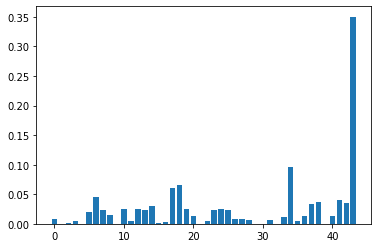

Index(['Dependents', 'Number of Referrals', 'Tenure in Months', 'Contract',
       'Satisfaction Score'],
      dtype='object')

Competitor


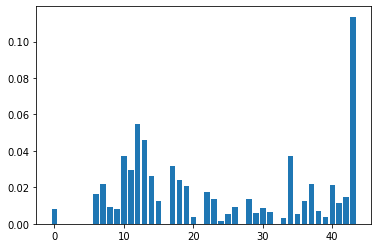

Index(['City', 'Latitude', 'Longitude', 'Contract', 'Satisfaction Score'], dtype='object')

Dissatisfaction


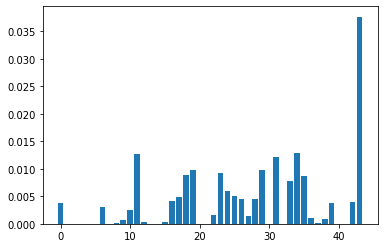

Index(['Zip Code', 'Offer', 'Streaming Movies', 'Contract',
       'Satisfaction Score'],
      dtype='object')

Attitude


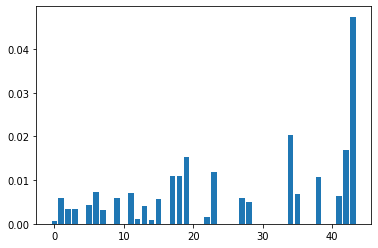

Index(['Offer', 'Internet Service', 'Contract', 'Total Revenue',
       'Satisfaction Score'],
      dtype='object')

Price


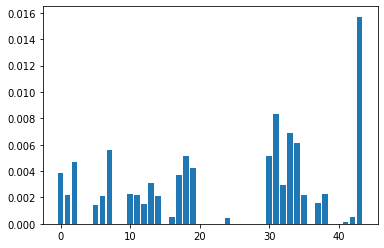

Index(['Number of Dependents', 'Streaming Movies', 'Unlimited Data',
       'Contract', 'Satisfaction Score'],
      dtype='object')

Other


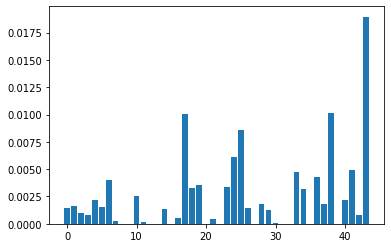

Index(['Number of Referrals', 'Internet Type', 'Avg Monthly GB Download',
       'Total Charges', 'Satisfaction Score'],
      dtype='object')


In [ ]:
# run GDB
training_data = pd.merge(data_, Train_IDs, on=["Customer ID"])
x_train = training_data.iloc[:, 2:-1]
print(training_data['Satisfaction Score'].value_counts())
print('\nnan count: ', training_data['Satisfaction Score'].isna().sum())
x_train = x_train.fillna(x_train.median())
x_train = x_train.to_numpy()

y_train = training_data['Churn Category'].to_numpy()

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

y_train = y_train.astype('int')
# training_data['Satisfaction Score']

x_test = pd.read_csv('/content/drive/MyDrive/HTML final project/x_test.csv')
x_test = x_test.fillna(x_test.median())
x_test = x_test.to_numpy()

print("x_test.shape: ", x_test.shape)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

status = ['No Churn', 'Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other']
for i in range(6):
  print()
  print(status[i])
  y_train_i = np.where(y_train == i, 1, -1)
  x_train_fs, x_test_fs, fs = select_features(x_train, y_train_i, x_test)
  # what are scores for the features
  # for i in range(len(fs.scores_)):
  # 	print('Feature %d: %f' % (i, fs.scores_[i]))
  # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  pyplot.show()
  cols = fs.get_support(indices=True)
  print(data.columns[cols+2])
# features_df_new = features_df.iloc[:,cols]
from sklearn.model_selection import train_test_split
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
# !pip install catboost
# from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# CAT = CatBoostClassifier
MLP = MLPClassifier()
NB = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()
SVCCC = SVC()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SGD = SGDClassifier()
ADA = AdaBoostClassifier()
DT = DecisionTreeClassifier()
RF = BaggingClassifier(DT)
XGB = XGBClassifier()
LGBM = LGBMClassifier()
GDB = GradientBoostingClassifier()

clf_lst = [MLP, NB, QDA, SVCCC, LR, KNN, SGD, ADA, DT, RF, XGB, LGBM, GDB]
# clf_lst = [ADA, DT, XGB, LGBM, GDB]
val_acc_lst = []
import numpy as np
import pandas as pd
from sklearn import metrics
for clf in clf_lst:
  val_clf = clf.fit(x_val_train, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test)
  val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
  val_acc_lst.append(val_acc)
 # print(f'{clf} false: ')
 # print(y_val_test[(y_val_test != val_y_predicted)])
 # print(f'{clf} true: ')
 # print(y_val_test[(y_val_test == val_y_predicted)])

print()
print("acc:")
for i in range(len(clf_lst)):
  print(val_acc_lst[i])

MLPClassifier() false: 
[0 0 1 0 0 0 0 0 1 4 1 0 0 0 0 2 0 2 1 0 2 3 1 1 1 2 2 5 1 0 4 1 1 0 1 3 3
 0 0 2 1 1 1 1 1 1 3 4 2 0 0 2 1 0 0 0 4 3 0 1 0 0 0 1 3 1 1 1 1 0 1 1 0 1
 3 4 1 3 2 1 2 3 0 1 1 0 3 1 0 1 1 2 0 0 0 0 2 1 0 2 1 0 0 1 1 1 1 1 0 2 5
 1 4 4 0 1 5 1 0 3 1 0 0 5 1 4 1 1 2 2 5 5 1 2 4 1 0 0 3 1 0 3 0 0 1 1 1 0
 5 0 0 1 0 3 0 0 0 4 2 0 2 5]
MLPClassifier() true: 
[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
GaussianNB() false: 
[0 0 0 0 0 0 0 1 4 0 0 0 0 2 0 0 2 1 0 0 2 3 1 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


SVC() false: 
[1 3 1 4 1 2 2 1 2 3 1 1 1 2 2 5 1 4 1 1 1 3 3 2 1 1 1 1 1 1 3 4 2 2 1 4 3
 1 1 3 1 1 1 1 1 1 1 3 4 1 3 2 1 3 2 3 3 1 1 3 1 1 1 2 2 1 3 2 1 1 1 1 1 1
 2 5 1 4 4 1 5 1 3 1 5 1 4 1 1 2 2 5 5 1 2 4 1 3 1 3 1 1 1 5 1 3 4 2 2 5]
SVC() true: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() false: 
[1 3 1 4 1 2 2 1 2 3 1 1 1 2 2 5 1 4 1 1 1 3 3 2 1 1 1 1 1 1 3 4 2 2 1 4 3
 1 1 3 1 1 1 1 1 1 1 3 4 1 3 2 1 3 2 3 3 1 1 3 1 1 1 2 2 1 3 2 1 1 1 1 1 1
 2 5 1 4 4 1 5 1 3 1 5 1 4 1 1 2 2 5 5 1 2 4 1 3 1 3 1 1 1 5 1 3 4 2 2 5]
LogisticRegression() true: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
KNeighborsClassifier() false: 
[1 3 0 1 4 1 2 2 2 3 1 2 2 5

In [ ]:
# change here to predict testing data by best classifier
test_clf = GDB.fit(x_train, y_train)
test_y_predicted = test_clf.predict(x_test)

In [ ]:
Test_IDs["Churn Category"] = test_y_predicted
Test_IDs.to_csv('take1.csv', index=False)